In [1]:
import zipfile
import numpy as np
zip_ref = zipfile.ZipFile("C:/Users/Aniket/OneDrive/Desktop/cyber_attack_detection/CSTR data files.zip")
zip_ref.extractall("/content/sample_data")
zip_ref.close()


In [2]:
import scipy.io
Tr_attack = scipy.io.loadmat('/content/sample_data/CSTR_train_attack.mat') 
Tr_noise = scipy.io.loadmat('/content/sample_data/CSTR_train_noise.mat')
Tr_normal = scipy.io.loadmat('/content/sample_data/CSTR_train_normal.mat')
Te_attack = scipy.io.loadmat('/content/sample_data/CSTR_test_attack.mat') 
Te_noise = scipy.io.loadmat('/content/sample_data/CSTR_test_noise.mat')
Te_normal = scipy.io.loadmat('/content/sample_data/CSTR_test_normal.mat')

In [3]:
Train_attack = Tr_attack['CSTR_train_attack']
Train_noise = Tr_noise['CSTR_train_noise']
Train_Normal = Tr_normal['CSTR_train_normal']
Test_attack = Te_attack['CSTR_test_attack']
Test_noise = Te_noise['CSTR_test_noise']
Test_Normal = Te_normal['CSTR_test_normal']

In [4]:
print("The size of the training dataset for Attack",Train_attack.shape)
print("The size of the training dataset for Noise",Train_noise.shape)
print("The size of the training dataset for Normal",Train_Normal.shape)
print("The size of the testing dataset for Attack",Test_attack.shape)
print("The size of the testing dataset for Noise",Test_noise.shape)
print("The size of the testing dataset for Normal",Test_Normal.shape)

The size of the training dataset for Attack (694, 201)
The size of the training dataset for Noise (694, 201)
The size of the training dataset for Normal (694, 201)
The size of the testing dataset for Attack (15, 201)
The size of the testing dataset for Noise (15, 201)
The size of the testing dataset for Normal (15, 201)


In [5]:
Combined_training = []
for x in Train_attack[:,:-1]:
  Combined_training.append(x)
for x in Train_noise[:,:-1]:
  Combined_training.append(x)
for x in Train_Normal[:,:-1]:
  Combined_training.append(x) 

In [6]:
Combined_training =np.array(Combined_training)
print("The combined training set",Combined_training.shape)

The combined training set (2082, 200)


In [7]:
Training_target = []
for x in Train_attack[:,-1]:
  Training_target.append(x)
for x in Train_noise[:,-1]:
  Training_target.append(x)
for x in Train_Normal[:,-1]:
  Training_target.append(x)

In [8]:
Training_target = np.array(Training_target)
print("The combined target training set",Training_target.shape)

The combined target training set (2082,)


In [9]:
Combined_testing = []
for x in Test_attack[:,:-1]:
  Combined_testing.append(x)
for x in Test_noise[:,:-1]:
  Combined_testing.append(x)
for x in Test_Normal[:,:-1]:
  Combined_testing.append(x)

In [10]:
Combined_testing = np.array(Combined_testing)
print("The combined target testing set",Combined_testing.shape)

The combined target testing set (45, 200)


In [11]:
Target_testing = []
for x in Test_attack[:,-1]:
  Target_testing.append(x)
for x in Test_noise[:,-1]:
  Target_testing.append(x)
for x in Test_Normal[:,-1]:
  Target_testing.append(x) 

In [12]:
Target_testing = np.array(Target_testing)
print("The combined target testing set",Target_testing.shape)

The combined target testing set (45,)


In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
target_total_train = enc.fit_transform(Training_target.reshape(-1,1))
target_total_train = np.array(target_total_train)
target_total_test = enc.fit_transform(Target_testing.reshape(-1,1))
target_total_test = np.array(target_total_test)
print("Total Testing size: ",target_total_test.shape)
print("Total Training size: ",target_total_train.shape)

Total Testing size:  (45, 3)
Total Training size:  (2082, 3)


In [14]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[200,]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

c:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,503 (103.53 KB)

 Trainable params: 26,503 (103.53 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras import losses
from tensorflow import keras

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(
        learning_rate=0.00001,  
        beta_1=0.9,
        beta_2=0.999,
        amsgrad=True
    ),
    metrics=["accuracy"]
)

hist = model.fit(
    Combined_training,  
    target_total_train,  
    epochs=1000,  
    batch_size=32,  
    validation_data=(Combined_testing, target_total_test)  
)



# Save the trained model
model_save_path = "cyber_attack_detection.h5"
model.save(model_save_path)
print("Model saved successfully at:", model_save_path)


Epoch 1/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3877 - loss: 14.7378 - val_accuracy: 0.2444 - val_loss: 25.4486
Epoch 2/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5268 - loss: 6.3568 - val_accuracy: 0.4000 - val_loss: 6.4112
Epoch 3/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - loss: 3.2394 - val_accuracy: 0.6000 - val_loss: 2.1707
Epoch 4/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7136 - loss: 2.2603 - val_accuracy: 0.6444 - val_loss: 1.9492
Epoch 5/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 1.6916 - val_accuracy: 0.6667 - val_loss: 1.6030
Epoch 6/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7751 - loss: 1.3452 - val_accuracy: 0.7778 - val_loss: 1.2796
Epoch 7/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 1.0718 - val_accuracy: 0.8222 - val_loss: 0.9799
Epoch 8/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.8508 - val_accuracy: 

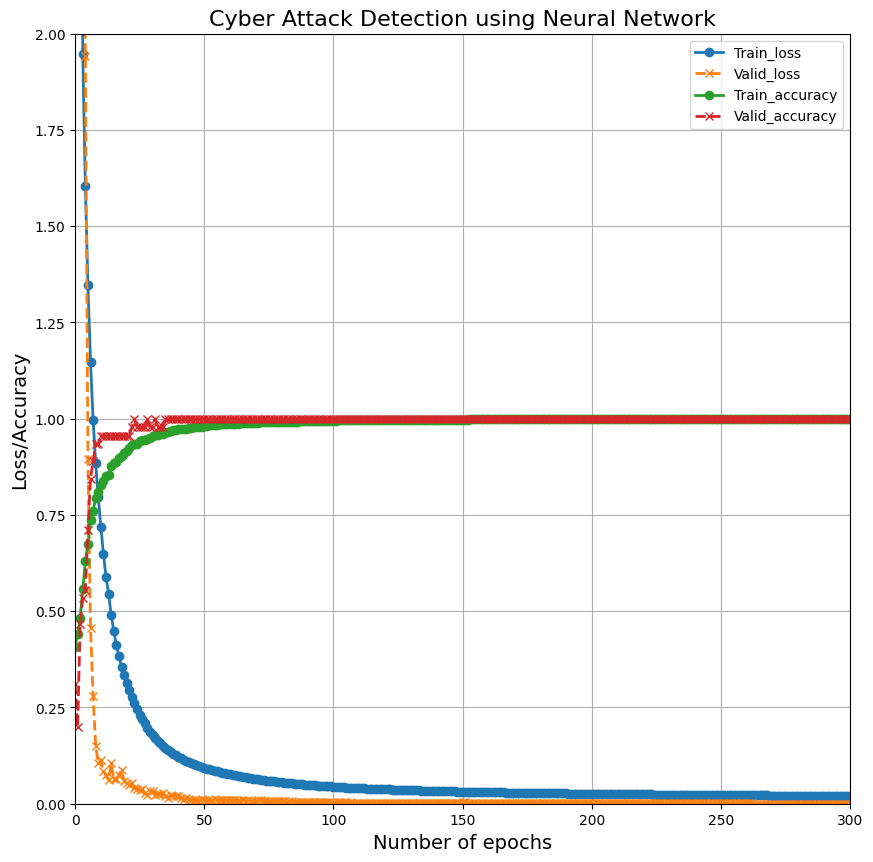

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

plt.plot(hist.history['loss'], label="Train_loss", linestyle='solid', linewidth=2, marker='o', markersize=6)
plt.plot(hist.history['val_loss'], label="Valid_loss", linestyle='--', linewidth=2, marker='x', markersize=6)

plt.plot(hist.history['accuracy'], label="Train_accuracy", linestyle='solid', linewidth=2, marker='o', markersize=6)
plt.plot(hist.history['val_accuracy'], label="Valid_accuracy", linestyle='--', linewidth=2, marker='x', markersize=6)

plt.gca().set_xlim(0, 300)
plt.gca().set_ylim(0, 2)  

plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Loss/Accuracy', fontsize=14)
plt.title('Cyber Attack Detection using Neural Network', fontsize=16)

plt.legend()
plt.grid(True)

plt.show()



In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(Combined_training, target_total_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(Combined_testing, target_total_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  1.0
